In [1]:
# load part of the toolkit
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
data = pd.read_csv('Coimbra_breast_cancer_dataset.csv')
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [5]:
# view info:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [4]:
# modify Classification so we have 0 and 1 values:

data['Classification'] = data['Classification'] - 1

# Define X and y:

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [6]:
# train test split:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=639)

In [26]:
# first we´re going to try logistic regression without scalling and without dimensionality reduction:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

lr_1 = LogisticRegression()

grid_params = {
                'penalty': [None, 'l2', 'l1', 'elasticnet'],
                'C': [0.01, 0.1, 1, 2, 5, 7, 10],
                'random_state': [639],
                'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                'l1_ratio': [0, 0.25, 0.5, 0.75, 1]
}

grid_search = GridSearchCV(lr_1, grid_params, cv=10, scoring='roc_auc')

grid_search.fit(X_train, y_train)
print(f'Best hyperparameters: {grid_search.best_params_}')

best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
best_auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC on the test set: {best_auc:.4f}')


Best hyperparameters: {'C': 5, 'l1_ratio': 0, 'penalty': 'l2', 'random_state': 639, 'solver': 'liblinear'}
AUC on the test set: 0.8370


In [12]:
# the second version implements z_score scalling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_2 = LogisticRegression()

grid_params = {
                'penalty': [None, 'l2', 'l1', 'elasticnet'],
                'C': [0.01, 0.1, 1, 2, 5, 7, 10],
                'random_state': [639],
                'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                'l1_ratio': [0, 0.25, 0.5, 0.75, 1]
}

grid_search = GridSearchCV(lr_2, grid_params, cv=10, scoring='roc_auc')

grid_search.fit(X_train_scaled, y_train)
print(f'Best hyperparameters: {grid_search.best_params_}')

best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]
best_auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC on the test set: {best_auc:.4f}')

Best parameters: {'C': 1, 'l1_ratio': 0, 'penalty': 'l1', 'random_state': 639, 'solver': 'liblinear'}
AUC on the test set: 0.8370


In [ ]:
# we can see that the AUC is indiferent to scalling (despite the hiperparameters changed)

In [13]:
# third version implements min-max scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_3 = LogisticRegression()

grid_params = {
                'penalty': [None, 'l2', 'l1', 'elasticnet'],
                'C': [0.01, 0.1, 1, 2, 5, 7, 10],
                'random_state': [639],
                'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                'l1_ratio': [0, 0.25, 0.5, 0.75, 1]
}

grid_search = GridSearchCV(lr_3, grid_params, cv=10, scoring='roc_auc')

grid_search.fit(X_train_scaled, y_train)
print(f'Best hyperparameters: {grid_search.best_params_}')

best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]
best_auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC on the test set: {best_auc:.4f}')

Best hyperparameters: {'C': 5, 'l1_ratio': 0, 'penalty': 'l1', 'random_state': 639, 'solver': 'saga'}
AUC on the test set: 0.8370


In [ ]:
# again, this algoritm returns the same AUC independently of the scalling

In [15]:
# here we will use PCA to reduce dimensionality, with the best parameters of the z_scalling
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

best_hyperparameters = {'C': 1, 'l1_ratio': 0, 'penalty': 'l1', 'random_state': 639, 'solver': 'liblinear'}

n_comp = []
auc = []
for i in range(1,10):
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    lr = LogisticRegression(**best_hyperparameters)
    lr.fit(X_train_pca, y_train)
    y_pred_proba = lr.predict_proba(X_test_pca)[:,1]
    auc_i = roc_auc_score(y_test, y_pred_proba)
    n_comp.append(i)
    auc.append(auc_i)
    print(f'LogReg AUC: {auc_i:.4f}, Number of components: {i}')

LogReg AUC: 0.6519, Number of components: 1
LogReg AUC: 0.7037, Number of components: 2
LogReg AUC: 0.7704, Number of components: 3
LogReg AUC: 0.6593, Number of components: 4
LogReg AUC: 0.7111, Number of components: 5
LogReg AUC: 0.7481, Number of components: 6
LogReg AUC: 0.8148, Number of components: 7
LogReg AUC: 0.8148, Number of components: 8
LogReg AUC: 0.8148, Number of components: 9


Text(0.5, 1.0, 'PCA Analysis')

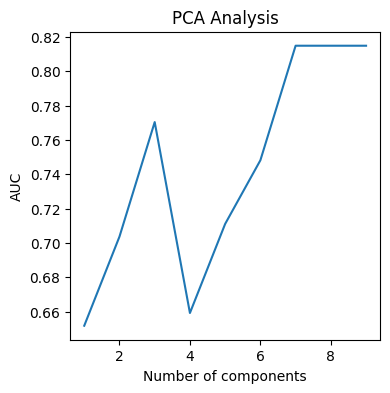

In [17]:
plt.figure(figsize=(4,4))
plt.plot(n_comp, auc)
plt.xlabel('Number of components')
plt.ylabel('AUC')
plt.title('PCA Analysis')

In [ ]:
# we can see that PCA best performance it´s with 7 components, and it has lower AUC than without PCA

In [21]:
# Now we´re going to try LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

best_hyperparameters = {'C': 1, 'l1_ratio': 0, 'penalty': 'l1', 'random_state': 639, 'solver': 'liblinear'}

lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)
lr = LogisticRegression(**best_hyperparameters)
lr.fit(X_train_lda, y_train)
y_pred_proba = lr.predict_proba(X_test_lda)[:,1]
auc_i = roc_auc_score(y_test, y_pred_proba)
print(f'LogReg AUC: {auc_i:.4f}, Number of components: 1')

LogReg AUC: 0.8296, Number of components: 1


In [22]:
# Using only LDA has a good performance but not as without LDA.
# Let´s try PCA + LDA

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

best_hyperparameters = {'C': 1, 'l1_ratio': 0, 'penalty': 'l1', 'random_state': 639, 'solver': 'liblinear'}

n_comp = []
auc = []
for i in range(1,10):
    pca = PCA(n_components=i)
    lda = LinearDiscriminantAnalysis(n_components=1)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    X_train_lda = lda.fit_transform(X_train_pca, y_train)
    X_test_lda = lda.transform(X_test_pca)
    lr = LogisticRegression(**best_hyperparameters)
    lr.fit(X_train_lda, y_train)
    y_pred_proba = lr.predict_proba(X_test_lda)[:,1]
    auc_i = roc_auc_score(y_test, y_pred_proba)
    n_comp.append(i)
    auc.append(auc_i)
    print(f'LogReg AUC: {auc_i:.4f}, Number of components (PCA): {i}')

LogReg AUC: 0.6519, Number of components (PCA): 1
LogReg AUC: 0.7037, Number of components (PCA): 2
LogReg AUC: 0.8000, Number of components (PCA): 3
LogReg AUC: 0.6667, Number of components (PCA): 4
LogReg AUC: 0.6889, Number of components (PCA): 5
LogReg AUC: 0.7556, Number of components (PCA): 6
LogReg AUC: 0.8222, Number of components (PCA): 7
LogReg AUC: 0.8000, Number of components (PCA): 8
LogReg AUC: 0.8296, Number of components (PCA): 9


In [25]:
# Previous application of PCA doesn´t improve the performance of LDA.
# let´s try NMF
from sklearn.decomposition import NMF

best_hyperparameters = {'C': 1, 'l1_ratio': 0, 'penalty': 'l1', 'random_state': 639, 'solver': 'liblinear'}

n_comp = []
auc = []
for i in range(1,10):
    nmf = NMF(n_components=i)
    X_train_nmf = nmf.fit_transform(X_train)
    X_test_nmf = nmf.transform(X_test)
    lr = LogisticRegression(**best_hyperparameters)
    lr.fit(X_train_nmf, y_train)
    y_pred_proba = lr.predict_proba(X_test_nmf)[:,1]
    auc_i = roc_auc_score(y_test, y_pred_proba)
    n_comp.append(i)
    auc.append(auc_i)
    print(f'LogReg AUC: {auc_i:.4f}, Number of components (PCA): {i}')

LogReg AUC: 0.3407, Number of components (PCA): 1
LogReg AUC: 0.5037, Number of components (PCA): 2
LogReg AUC: 0.3185, Number of components (PCA): 3
LogReg AUC: 0.3037, Number of components (PCA): 4
LogReg AUC: 0.7556, Number of components (PCA): 5
LogReg AUC: 0.5926, Number of components (PCA): 6
LogReg AUC: 0.3852, Number of components (PCA): 7
LogReg AUC: 0.7333, Number of components (PCA): 8
LogReg AUC: 0.7481, Number of components (PCA): 9


NMF does not improves the performance. We conclude that the best LogistigRegression Model is:  
Best hyperparameters: {'C': 5, 'penalty': 'l2', 'solver': 'liblinear'}  
Scaling: None  
Dimensionality reduction: None  
AUC on the test set: 0.8370

In [29]:
# let´s try LinearRegressionCV
from sklearn.linear_model import LogisticRegressionCV

lr_CV = LogisticRegressionCV()

grid_params = {
                'penalty': ['l2', 'l1', 'elasticnet'],
                'Cs': [0.01, 0.1, 1, 2, 5, 7, 10, 15, 20],
                'random_state': [639],
                'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                'cv': [10]
}

grid_search = GridSearchCV(lr_CV, grid_params, cv=10, scoring='roc_auc')

grid_search.fit(X_train, y_train)
print(f'Best hyperparameters: {grid_search.best_params_}')

best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
best_auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC on the test set: {best_auc:.4f}')

Best hyperparameters: {'Cs': 7, 'cv': 10, 'penalty': 'l2', 'random_state': 639, 'solver': 'lbfgs'}
AUC on the test set: 0.8222
